## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  76.290572   833.007489  0.828364  5.814674  1.385033
1  80.898027   791.563449  0.182295  6.371925  0.808758
2  75.786547   602.394328  0.506252  7.104375  1.235157
3  31.460587   803.319645  0.366610  5.951451  1.371623
4  16.319146  1459.873623  0.641572  2.408409  1.666281


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0279567	total: 57.2ms	remaining: 57.1s
1:	learn: 1.0190665	total: 57.6ms	remaining: 28.7s
2:	learn: 1.0084257	total: 58ms	remaining: 19.3s
3:	learn: 0.9993243	total: 58.4ms	remaining: 14.6s
4:	learn: 0.9878928	total: 58.9ms	remaining: 11.7s
5:	learn: 0.9792059	total: 59.4ms	remaining: 9.83s
6:	learn: 0.9667267	total: 59.9ms	remaining: 8.5s
7:	learn: 0.9543088	total: 60.3ms	remaining: 7.47s
8:	learn: 0.9460783	total: 60.7ms	remaining: 6.69s
9:	learn: 0.9359043	total: 61.4ms	remaining: 6.07s
10:	learn: 0.9281974	total: 62ms	remaining: 5.57s
11:	learn: 0.9195874	total: 62.4ms	remaining: 5.14s
12:	learn: 0.9078599	total: 62.9ms	remaining: 4.77s
13:	learn: 0.8983008	total: 63.4ms	remaining: 4.46s
14:	learn: 0.8885910	total: 63.7ms	remaining: 4.18s
15:	learn: 0.8799109	total: 64.2ms	remaining: 3.94s
16:	learn: 0.8679973	total: 64.5ms	remaining: 3.73s
17:	learn: 0.8594532	total: 65ms	remaining: 3.54s
18:	learn: 0.8517369	total: 65.3ms	remaining: 3.37s

112:	learn: 0.3838144	total: 108ms	remaining: 846ms
113:	learn: 0.3812697	total: 108ms	remaining: 841ms
114:	learn: 0.3786460	total: 109ms	remaining: 836ms
115:	learn: 0.3758445	total: 109ms	remaining: 831ms
116:	learn: 0.3733568	total: 109ms	remaining: 826ms
117:	learn: 0.3709067	total: 110ms	remaining: 821ms
118:	learn: 0.3687421	total: 110ms	remaining: 816ms
119:	learn: 0.3659957	total: 111ms	remaining: 811ms
120:	learn: 0.3632576	total: 111ms	remaining: 807ms
121:	learn: 0.3608033	total: 111ms	remaining: 801ms
122:	learn: 0.3587332	total: 112ms	remaining: 797ms
123:	learn: 0.3556942	total: 112ms	remaining: 792ms
124:	learn: 0.3533506	total: 112ms	remaining: 787ms
125:	learn: 0.3512698	total: 113ms	remaining: 783ms
126:	learn: 0.3487191	total: 114ms	remaining: 780ms
127:	learn: 0.3465604	total: 114ms	remaining: 776ms
128:	learn: 0.3438458	total: 114ms	remaining: 772ms
129:	learn: 0.3414351	total: 115ms	remaining: 768ms
130:	learn: 0.3395518	total: 115ms	remaining: 764ms
131:	learn: 

287:	learn: 0.1610066	total: 185ms	remaining: 458ms
288:	learn: 0.1606971	total: 186ms	remaining: 457ms
289:	learn: 0.1604053	total: 186ms	remaining: 456ms
290:	learn: 0.1597797	total: 187ms	remaining: 455ms
291:	learn: 0.1590232	total: 187ms	remaining: 454ms
292:	learn: 0.1587376	total: 188ms	remaining: 452ms
293:	learn: 0.1582386	total: 188ms	remaining: 451ms
294:	learn: 0.1576996	total: 188ms	remaining: 450ms
295:	learn: 0.1569623	total: 189ms	remaining: 449ms
296:	learn: 0.1566780	total: 189ms	remaining: 448ms
297:	learn: 0.1564118	total: 190ms	remaining: 448ms
298:	learn: 0.1556927	total: 191ms	remaining: 447ms
299:	learn: 0.1554472	total: 191ms	remaining: 446ms
300:	learn: 0.1551870	total: 191ms	remaining: 445ms
301:	learn: 0.1547290	total: 192ms	remaining: 443ms
302:	learn: 0.1541339	total: 192ms	remaining: 442ms
303:	learn: 0.1538405	total: 193ms	remaining: 441ms
304:	learn: 0.1535733	total: 193ms	remaining: 439ms
305:	learn: 0.1531670	total: 193ms	remaining: 438ms
306:	learn: 

525:	learn: 0.0848490	total: 289ms	remaining: 261ms
526:	learn: 0.0844073	total: 290ms	remaining: 260ms
527:	learn: 0.0842019	total: 290ms	remaining: 260ms
528:	learn: 0.0840004	total: 291ms	remaining: 259ms
529:	learn: 0.0836002	total: 291ms	remaining: 258ms
530:	learn: 0.0834271	total: 292ms	remaining: 258ms
531:	learn: 0.0832575	total: 292ms	remaining: 257ms
532:	learn: 0.0828797	total: 293ms	remaining: 256ms
533:	learn: 0.0825202	total: 293ms	remaining: 256ms
534:	learn: 0.0823261	total: 293ms	remaining: 255ms
535:	learn: 0.0821627	total: 294ms	remaining: 254ms
536:	learn: 0.0817974	total: 294ms	remaining: 254ms
537:	learn: 0.0813807	total: 295ms	remaining: 253ms
538:	learn: 0.0810346	total: 295ms	remaining: 252ms
539:	learn: 0.0808465	total: 296ms	remaining: 252ms
540:	learn: 0.0806905	total: 296ms	remaining: 251ms
541:	learn: 0.0805377	total: 297ms	remaining: 251ms
542:	learn: 0.0801721	total: 297ms	remaining: 250ms
543:	learn: 0.0799071	total: 297ms	remaining: 249ms
544:	learn: 

704:	learn: 0.0519824	total: 368ms	remaining: 154ms
705:	learn: 0.0518729	total: 369ms	remaining: 154ms
706:	learn: 0.0517655	total: 369ms	remaining: 153ms
707:	learn: 0.0516449	total: 369ms	remaining: 152ms
708:	learn: 0.0514807	total: 370ms	remaining: 152ms
709:	learn: 0.0513536	total: 371ms	remaining: 151ms
710:	learn: 0.0511442	total: 371ms	remaining: 151ms
711:	learn: 0.0510377	total: 371ms	remaining: 150ms
712:	learn: 0.0508246	total: 372ms	remaining: 150ms
713:	learn: 0.0507326	total: 372ms	remaining: 149ms
714:	learn: 0.0505293	total: 373ms	remaining: 149ms
715:	learn: 0.0503707	total: 373ms	remaining: 148ms
716:	learn: 0.0502798	total: 374ms	remaining: 147ms
717:	learn: 0.0501771	total: 374ms	remaining: 147ms
718:	learn: 0.0501344	total: 374ms	remaining: 146ms
719:	learn: 0.0500452	total: 375ms	remaining: 146ms
720:	learn: 0.0499821	total: 375ms	remaining: 145ms
721:	learn: 0.0497994	total: 375ms	remaining: 145ms
722:	learn: 0.0497580	total: 376ms	remaining: 144ms
723:	learn: 

946:	learn: 0.0286105	total: 472ms	remaining: 26.4ms
947:	learn: 0.0285729	total: 472ms	remaining: 25.9ms
948:	learn: 0.0284790	total: 473ms	remaining: 25.4ms
949:	learn: 0.0284077	total: 473ms	remaining: 24.9ms
950:	learn: 0.0283705	total: 474ms	remaining: 24.4ms
951:	learn: 0.0283338	total: 474ms	remaining: 23.9ms
952:	learn: 0.0282374	total: 475ms	remaining: 23.4ms
953:	learn: 0.0281674	total: 475ms	remaining: 22.9ms
954:	learn: 0.0281311	total: 476ms	remaining: 22.4ms
955:	learn: 0.0281028	total: 476ms	remaining: 21.9ms
956:	learn: 0.0280071	total: 477ms	remaining: 21.4ms
957:	learn: 0.0279552	total: 477ms	remaining: 20.9ms
958:	learn: 0.0278478	total: 477ms	remaining: 20.4ms
959:	learn: 0.0278121	total: 478ms	remaining: 19.9ms
960:	learn: 0.0277611	total: 478ms	remaining: 19.4ms
961:	learn: 0.0277258	total: 479ms	remaining: 18.9ms
962:	learn: 0.0276345	total: 479ms	remaining: 18.4ms
963:	learn: 0.0275664	total: 479ms	remaining: 17.9ms
964:	learn: 0.0275314	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

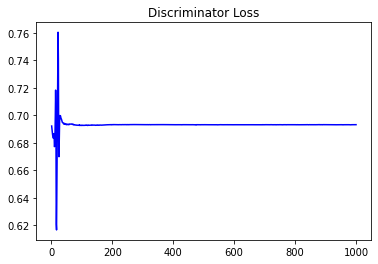

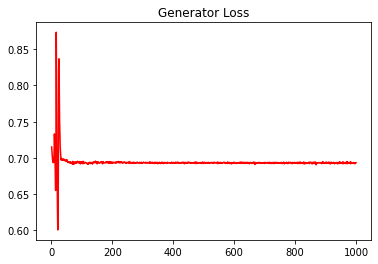

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2528594062512933


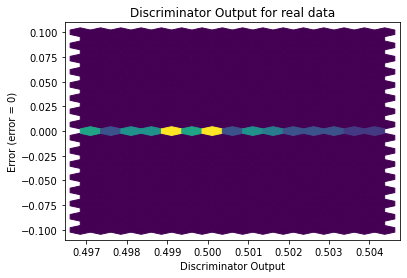

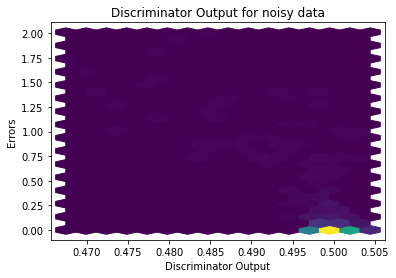

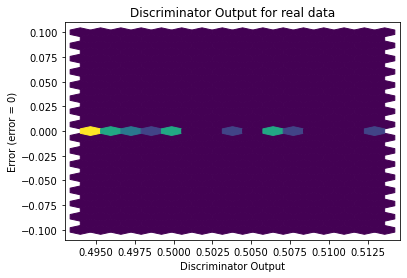

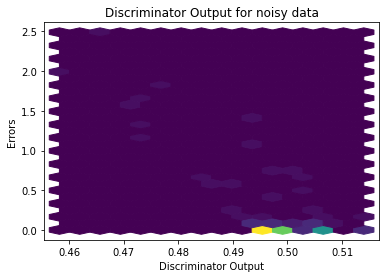

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


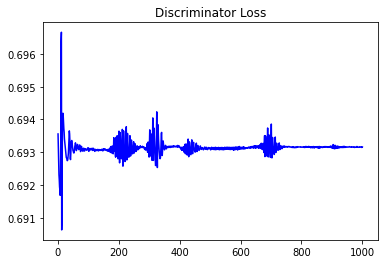

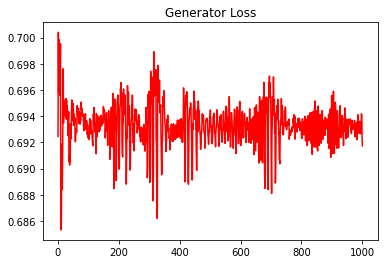

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23571261124482107


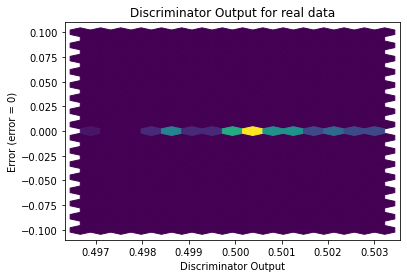

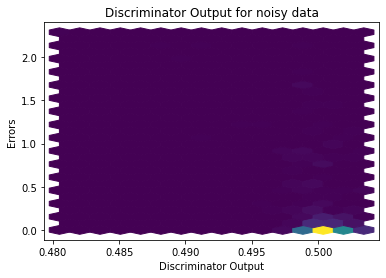

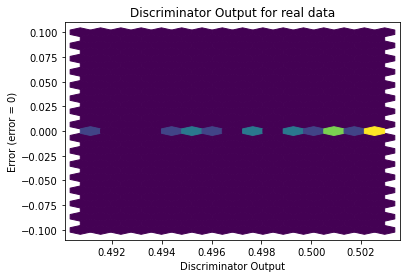

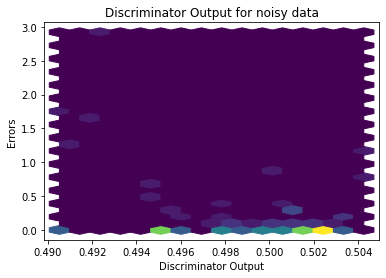

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0639]], requires_grad=True)
